# Capstone Project_CAP_1

Author: Gowtham Iyer

Dataset: https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset

In [5]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

## Loading the dataset

In [7]:
# Importing the dataset
dataset = pd.read_csv('/content/Bank Customer Churn Prediction.csv')

In [8]:
print(dataset.shape)

(10000, 12)


In [9]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None


##Understanding the data

In [10]:
print(dataset.head())
print(dataset.describe())
print(dataset.info())

   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  
        customer_id  credit_score           age        tenure        balance  \
count  1.000000e+04  10000.000000  10000.00

## Enumerating features

In [11]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

gender = dataset['gender']
gender_le = le.fit_transform(gender)
dataset['gender'] = gender_le

country = dataset['country']
country_le = le.fit_transform(country)
dataset['country'] = country_le

## Segregating independent variables (features) and the dependent variable (class variable) in the dataset

In [13]:
X = dataset.drop(columns=['churn', 'customer_id'])
print(X.head(), '\n')

y = dataset['churn']
print(y.head())

   credit_score  country  gender  age  tenure    balance  products_number  \
0           619        0       0   42       2       0.00                1   
1           608        2       0   41       1   83807.86                1   
2           502        0       0   42       8  159660.80                3   
3           699        0       0   39       1       0.00                2   
4           850        2       0   43       2  125510.82                1   

   credit_card  active_member  estimated_salary  
0            1              1         101348.88  
1            0              1         112542.58  
2            1              0         113931.57  
3            0              0          93826.63  
4            1              1          79084.10   

0    1
1    0
2    1
3    0
4    0
Name: churn, dtype: int64


# K Means Clustering

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting distribution of 'churn' class variable

<ipython-input-15-9cd05cbcb02f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['churn'], color='orange', bins=1)


<Axes: title={'center': 'Distribution Plot of "churn" variable'}, xlabel='churn', ylabel='Density'>

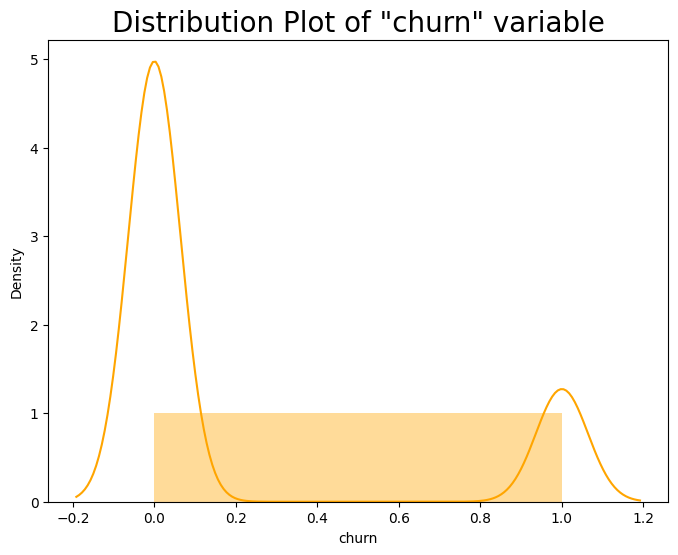

In [15]:
fig_bank_churn, ax = plt.subplots(figsize=(8, 6))
plt.title('Distribution Plot of "churn" variable', fontsize=20)
sns.distplot(dataset['churn'], color='orange', bins=1)


# Normalizing the dataset

In [20]:
dataset_dropped_1 = dataset.drop('churn', axis=1)
dataset_dropped = dataset.drop('customer_id', axis=1)
X_kmeans = dataset_dropped.values[:, 1:]
dataset_cluster = StandardScaler().fit_transform(X_kmeans)

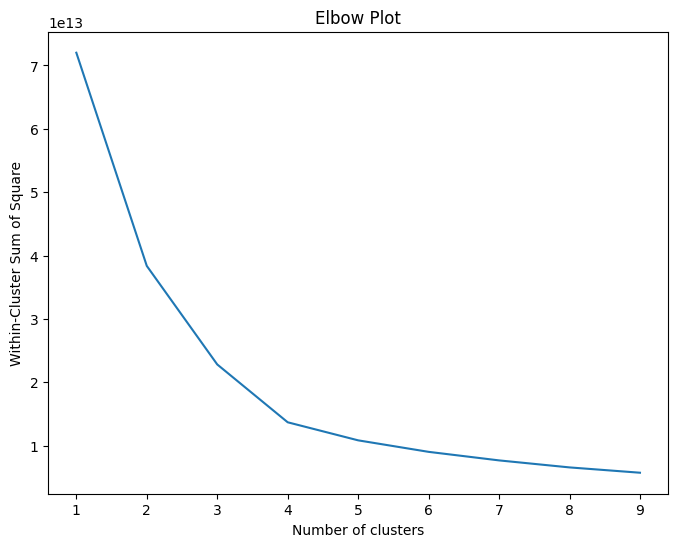

In [30]:
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_kmeans)
    wcss.append(kmeans.inertia_)
fig_k_mean, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,10),wcss)
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Square')
plt.show()

In [31]:
clusterNum = 3
k_means =KMeans(init='k-means++', n_clusters=clusterNum, n_init=10)
k_means.fit(X_kmeans)
labels = k_means.labels_
print(labels)

[1 0 0 ... 1 2 2]


# Assigning lables to each row in dataframe

In [32]:
dataset_dropped['Clus_km'] = labels
print(dataset_dropped.head())

print(dataset_dropped.groupby('Clus_km').mean())

   credit_score  country  gender  age  tenure    balance  products_number  \
0           619        0       0   42       2       0.00                1   
1           608        2       0   41       1   83807.86                1   
2           502        0       0   42       8  159660.80                3   
3           699        0       0   39       1       0.00                2   
4           850        2       0   43       2  125510.82                1   

   credit_card  active_member  estimated_salary  churn  Clus_km  
0            1              1         101348.88      1        1  
1            0              1         112542.58      0        0  
2            1              0         113931.57      1        0  
3            0              0          93826.63      0        1  
4            1              1          79084.10      0        2  
         credit_score   country    gender        age    tenure        balance  \
Clus_km                                                     

# Creating 2-D graph

Text(0, 0.5, 'Estimated Salary')

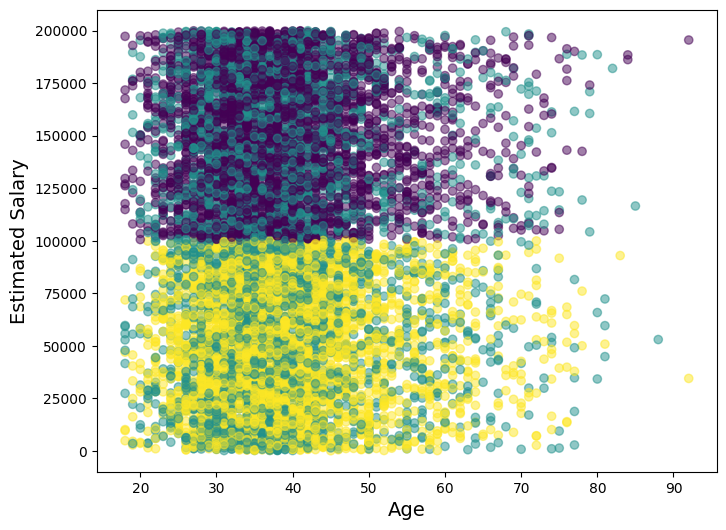

In [36]:
fig_2d, ax = plt.subplots(figsize=(8, 6))
plt.scatter(X_kmeans[:, 2], X_kmeans[:, 8], c=labels.astype(np.float64), alpha=.5)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Estimated Salary', fontsize=14)

# Creating 3-D graph

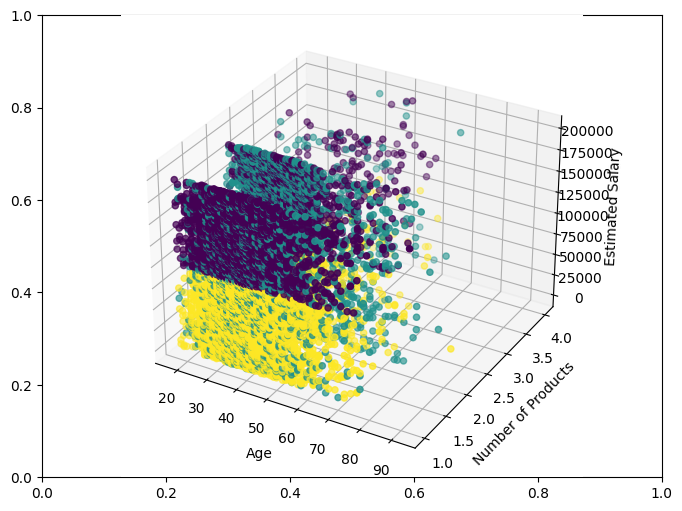

In [37]:
from mpl_toolkits.mplot3d import Axes3D
fig_3d, ax = plt.subplots(figsize=(8, 6))
ax = Axes3D(fig_3d, rect=[0, 0, 0.95, 1], elev=48, azim=134)

fig=plt.figure(1, figsize=(8, 8))
ax=fig.add_subplot(111,projection='3d')

ax.set_xlabel('Age')
ax.set_ylabel('Number of Products')
ax.set_zlabel('Estimated Salary')

ax.scatter(X_kmeans[:, 2], X_kmeans[:, 5], X_kmeans[:, 8], c= labels.astype(np.float64))
plt.show()

# Re-initializing dataset to reset any stored values (due to Colab environment)

In [38]:
# Importing the dataset
dataset = pd.read_csv('/content/Bank Customer Churn Prediction.csv')

# Enumerating attributes
le = preprocessing.LabelEncoder()

gender = dataset['gender']
gender_le = le.fit_transform(gender)
dataset['gender'] = gender_le

country = dataset['country']
country_le = le.fit_transform(country)
dataset['country'] = country_le

# Segregating independent and class variables
X = dataset.drop(columns=['churn', 'customer_id'])
print(X.head(), '\n')

y = dataset['churn']
print(y.head())

   credit_score  country  gender  age  tenure    balance  products_number  \
0           619        0       0   42       2       0.00                1   
1           608        2       0   41       1   83807.86                1   
2           502        0       0   42       8  159660.80                3   
3           699        0       0   39       1       0.00                2   
4           850        2       0   43       2  125510.82                1   

   credit_card  active_member  estimated_salary  
0            1              1         101348.88  
1            0              1         112542.58  
2            1              0         113931.57  
3            0              0          93826.63  
4            1              1          79084.10   

0    1
1    0
2    1
3    0
4    0
Name: churn, dtype: int64


## Splitting data for Training and Testing


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7000, 10)
(7000,)
(3000, 10)
(3000,)


## Creating Logistic Regression model and Training it

In [40]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

## Evaluating the performance of Logistic Regression mode



In [41]:
from sklearn.metrics import classification_report

y_pred = logreg.predict(X_test)
print(y_pred)
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(logreg.score(X_test, y_test)))

report = classification_report(y_test, y_pred, labels=np.unique(y_pred))
#report = classification_report(y_test, y_pred)
print(report)

[0 0 0 ... 0 0 0]
Accuracy of logistic regression classifier on test set: 0.784
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      2379
           1       0.36      0.06      0.10       621

    accuracy                           0.78      3000
   macro avg       0.58      0.52      0.49      3000
weighted avg       0.71      0.78      0.72      3000



# Re-initializing dataset to reset any stored values (due to Colab environment)

In [74]:
# Importing the dataset
dataset = pd.read_csv('/content/Bank Customer Churn Prediction.csv')

# Enumerating attributes
le = preprocessing.LabelEncoder()

gender = dataset['gender']
gender_le = le.fit_transform(gender)
dataset['gender'] = gender_le

country = dataset['country']
country_le = le.fit_transform(country)
dataset['country'] = country_le

# Segregating independent and class variables
X = dataset.drop(columns=['churn', 'customer_id'])
print(X.head(), '\n')

y = dataset['churn']
print(y.head())

# Splitting data for training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

   credit_score  country  gender  age  tenure    balance  products_number  \
0           619        0       0   42       2       0.00                1   
1           608        2       0   41       1   83807.86                1   
2           502        0       0   42       8  159660.80                3   
3           699        0       0   39       1       0.00                2   
4           850        2       0   43       2  125510.82                1   

   credit_card  active_member  estimated_salary  
0            1              1         101348.88  
1            0              1         112542.58  
2            1              0         113931.57  
3            0              0          93826.63  
4            1              1          79084.10   

0    1
1    0
2    1
3    0
4    0
Name: churn, dtype: int64
(7000, 10)
(7000,)
(3000, 10)
(3000,)


## Creating ANN model and Training it

In [75]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

print(X_train.shape, y_train.shape)

strategies = ['most_frequent', 'stratified', 'uniform', 'constant']

test_scores = []
for s in strategies:
    if s =='constant':
        dclf = DummyClassifier(strategy = s, random_state = 0, constant=1)
    else:
        dclf = DummyClassifier(strategy = s, random_state = 0)
    dclf.fit(X_train, y_train)
    score = dclf.score(X_test, y_test)
    y_pred = dclf.predict(X_test)
    print(classification_report(y_test, y_pred, labels=np.unique(y_pred)))
    test_scores.append(score)

(7000, 10) (7000,)
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2379

   micro avg       0.79      1.00      0.88      2379
   macro avg       0.79      1.00      0.88      2379
weighted avg       0.79      1.00      0.88      2379

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      2379
           1       0.21      0.21      0.21       621

    accuracy                           0.67      3000
   macro avg       0.50      0.50      0.50      3000
weighted avg       0.67      0.67      0.67      3000

              precision    recall  f1-score   support

           0       0.78      0.48      0.59      2379
           1       0.20      0.49      0.28       621

    accuracy                           0.48      3000
   macro avg       0.49      0.48      0.44      3000
weighted avg       0.66      0.48      0.53      3000

              precision    recall  f1-score   support


In [76]:
# Creating the keras model

from keras.models import Sequential
from keras.layers import Dense

def build_model():
  # define the keras model
  model = Sequential()
  model.add(Dense(12, input_dim = 10, activation='sigmoid'))
  model.add(Dense(8, activation='sigmoid'))
  model.add(Dense(1, activation='sigmoid'))

  model.summary()

  return model

In [77]:
# Defining early stopping

from keras.callbacks import EarlyStopping

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=60)

model_ann = build_model()

print(X_train.shape)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 12)                132       
                                                                 
 dense_16 (Dense)            (None, 8)                 104       
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 245 (980.00 Byte)
Trainable params: 245 (980.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
(7000, 10)


In [78]:
# compiling the keras model

model_ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
#history = model_ann.fit(X_train, y_train, epochs=500,
#                    batch_size=10, validation_split=0.1, callbacks=[es])
history = model_ann.fit(X_train, y_train, epochs=500, batch_size=10, validation_split=0.1, callbacks=[es])

Epoch 1/500
630/630 [==============================] - 2s 2ms/step - loss: 0.5767 - accuracy: 0.7083 - val_loss: 0.4926 - val_accuracy: 0.8014
Epoch 2/500
630/630 [==============================] - 1s 2ms/step - loss: 0.4976 - accuracy: 0.7973 - val_loss: 0.4906 - val_accuracy: 0.8014
Epoch 3/500
630/630 [==============================] - 1s 2ms/step - loss: 0.4967 - accuracy: 0.7973 - val_loss: 0.4901 - val_accuracy: 0.8014
Epoch 4/500
630/630 [==============================] - 1s 2ms/step - loss: 0.4964 - accuracy: 0.7973 - val_loss: 0.4904 - val_accuracy: 0.8014
Epoch 5/500
630/630 [==============================] - 1s 2ms/step - loss: 0.4965 - accuracy: 0.7973 - val_loss: 0.4906 - val_accuracy: 0.8014
Epoch 6/500
630/630 [==============================] - 1s 2ms/step - loss: 0.4962 - accuracy: 0.7973 - val_loss: 0.4907 - val_accuracy: 0.8014
Epoch 7/500
630/630 [==============================] - 1s 2ms/step - loss: 0.4963 - accuracy: 0.7973 - val_loss: 0.4909 - val_accuracy: 0.8014

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


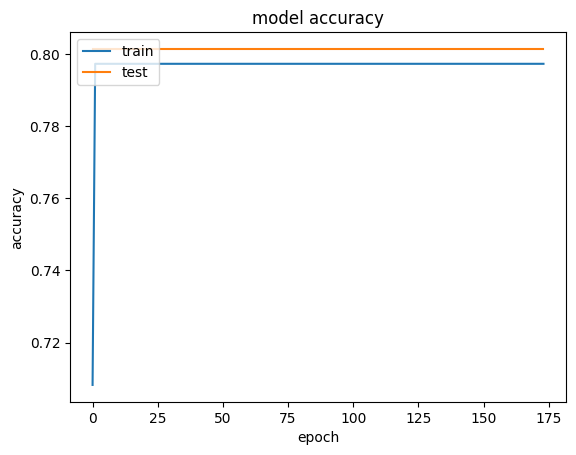

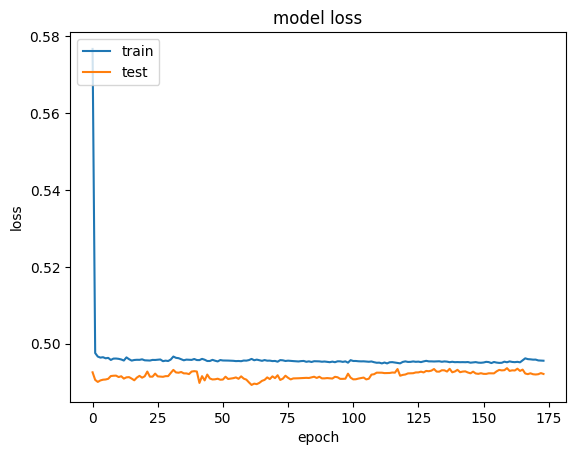

In [79]:
# Plotting Accuracy and Loss for the ANN model
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Evaluating the performance of ANN model

In [80]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import Binarizer

y_pred = model_ann.predict(X_test)

binarizer = Binarizer(threshold=0.5)
y_pred_binary = binarizer.fit_transform(y_pred)

# reduce to 1d array
# y_pred = y_pred[:, 0]
y_pred_binary = y_pred_binary[:, 0]

#report = classification_report(y_test, y_pred_binary, labels=np.unique(y_pred), zero_division=1)
report = classification_report(y_test, y_pred_binary, zero_division=1)
print(report)

94/94 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2379
           1       1.00      0.00      0.00       621

    accuracy                           0.79      3000
   macro avg       0.90      0.50      0.44      3000
weighted avg       0.84      0.79      0.70      3000



# Predictions on New Dataset

In [81]:
# Importing the dataset
dataset_new = pd.read_csv('/content/Bank Customer Churn Prediction - Copy.csv')

# Enumerating attributes
le = preprocessing.LabelEncoder()

gender = dataset_new['gender']
gender_le = le.fit_transform(gender)
dataset_new['gender'] = gender_le

country = dataset_new['country']
country_le = le.fit_transform(country)
dataset_new['country'] = country_le

# Segregating independent and class variables
X_new = dataset_new.drop(columns=['churn','customer_id'])
print(X.head(), '\n')

y_new = dataset_new['churn']
print(y.head())

from sklearn.metrics import classification_report
from sklearn.preprocessing import Binarizer

y_pred = model_ann.predict(X_new)

binarizer = Binarizer(threshold=0.5)
y_pred_binary = binarizer.fit_transform(y_pred)

# reduce to 1d array
# y_pred = y_pred[:, 0]
y_pred_binary = y_pred_binary[:, 0]

#report = classification_report(y_test, y_pred_binary, labels=np.unique(y_pred), zero_division=1)
report = classification_report(y_new, y_pred_binary, zero_division=1)
print(report)

   credit_score  country  gender  age  tenure    balance  products_number  \
0           619        0       0   42       2       0.00                1   
1           608        2       0   41       1   83807.86                1   
2           502        0       0   42       8  159660.80                3   
3           699        0       0   39       1       0.00                2   
4           850        2       0   43       2  125510.82                1   

   credit_card  active_member  estimated_salary  
0            1              1         101348.88  
1            0              1         112542.58  
2            1              0         113931.57  
3            0              0          93826.63  
4            1              1          79084.10   

0    1
1    0
2    1
3    0
4    0
Name: churn, dtype: int64
4/4 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        81
           1  

# Re-initializing dataset to reset any stored values (due to Colab environment)

In [52]:
# Importing the dataset
dataset = pd.read_csv('/content/Bank Customer Churn Prediction.csv')

# Enumerating attributes
le = preprocessing.LabelEncoder()

gender = dataset['gender']
gender_le = le.fit_transform(gender)
dataset['gender'] = gender_le

country = dataset['country']
country_le = le.fit_transform(country)
dataset['country'] = country_le

# Segregating independent and class variables
X = dataset.drop(columns=['churn','customer_id'])
print(X.head(), '\n')

y = dataset['churn']
print(y.head())

# Splitting data for training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

   credit_score  country  gender  age  tenure    balance  products_number  \
0           619        0       0   42       2       0.00                1   
1           608        2       0   41       1   83807.86                1   
2           502        0       0   42       8  159660.80                3   
3           699        0       0   39       1       0.00                2   
4           850        2       0   43       2  125510.82                1   

   credit_card  active_member  estimated_salary  
0            1              1         101348.88  
1            0              1         112542.58  
2            1              0         113931.57  
3            0              0          93826.63  
4            1              1          79084.10   

0    1
1    0
2    1
3    0
4    0
Name: churn, dtype: int64
(7000, 10)
(7000,)
(3000, 10)
(3000,)


## Creating SVM model and Training it

In [53]:
from sklearn import svm

# Creating the SVM Classifier model
model_svm = svm.SVC(kernel='rbf', C=1e-0, gamma=1e-3) # Linear Kernel

# Training the model using the training set
model_svm.fit(X_train, y_train)

SVC(gamma=0.001)

# Evaluating the performance of SVM model

In [55]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import Binarizer

y_pred = model_svm.predict(X_test)

#report = classification_report(y_test, y_pred_binary, labels=np.unique(y_pred), zero_division=1)
report = classification_report(y_test, y_pred, zero_division=1)
print(report)


              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2379
           1       0.00      0.00      0.00       621

    accuracy                           0.79      3000
   macro avg       0.40      0.50      0.44      3000
weighted avg       0.63      0.79      0.70      3000



# Re-initializing dataset to reset any stored values (due to Colab environment)

In [57]:
# Importing the dataset
dataset = pd.read_csv('/content/Bank Customer Churn Prediction.csv')

# Enumerating attributes
le = preprocessing.LabelEncoder()

gender = dataset['gender']
gender_le = le.fit_transform(gender)
dataset['gender'] = gender_le

country = dataset['country']
country_le = le.fit_transform(country)
dataset['country'] = country_le

# Segregating independent and class variables
X = dataset.drop(columns=['churn','customer_id'])
print(X.head(), '\n')

y = dataset['churn']
print(y.head())

# Splitting data for training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

   credit_score  country  gender  age  tenure    balance  products_number  \
0           619        0       0   42       2       0.00                1   
1           608        2       0   41       1   83807.86                1   
2           502        0       0   42       8  159660.80                3   
3           699        0       0   39       1       0.00                2   
4           850        2       0   43       2  125510.82                1   

   credit_card  active_member  estimated_salary  
0            1              1         101348.88  
1            0              1         112542.58  
2            1              0         113931.57  
3            0              0          93826.63  
4            1              1          79084.10   

0    1
1    0
2    1
3    0
4    0
Name: churn, dtype: int64
(7000, 10)
(7000,)
(3000, 10)
(3000,)


# Standardization of data

In [58]:
# Finding Mean
X_mean = X.mean()

# Finding Standard deviation
X_standard_dev = X.std()

# Standardization
Z = (X - X_mean) / X_standard_dev

# Finding PCA using Using Sklearn

In [60]:
# Importing PCA
from sklearn.decomposition import PCA
n_components = 3
pca = PCA(n_components = 3)
pca.fit(Z)
x_pca = pca.transform(Z)

# Create the dataframe
df_pca1 = pd.DataFrame(x_pca,
					columns=['PC{}'.
					format(i+1)
						for i in range(n_components)])
print(df_pca1)

           PC1       PC2       PC3
0     0.357826  0.878592  0.605269
1    -1.068574  1.562074  1.666116
2     1.044175 -1.072202  0.779474
3     1.457502  0.279597  2.090941
4    -1.408721  1.573275  0.019753
...        ...       ...       ...
9995  1.538539 -0.605535 -0.758051
9996 -0.156249 -0.720702 -1.515210
9997  0.428363  0.782576  0.414346
9998  0.433532 -0.160712 -0.582295
9999 -0.842764 -1.171377  0.251429

[10000 rows x 3 columns]


# Plotting the components - Results from Sklearn package

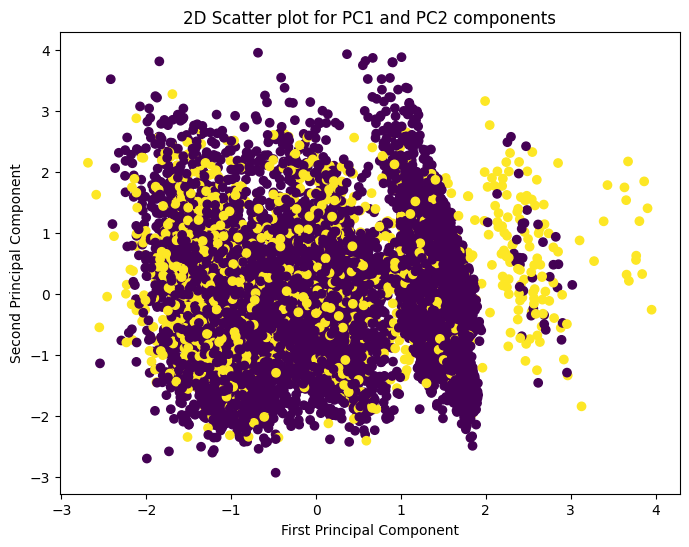

In [61]:
plt.figure(figsize=(8, 6))

label_encoder = preprocessing.LabelEncoder()
y_label_encoder = label_encoder.fit_transform(y)

plt.scatter(x_pca[:, 0], x_pca[:, 1], c = y_label_encoder, cmap='viridis')

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('2D Scatter plot for PC1 and PC2 components')
plt.show()

# Creating and evaluating ANN model for PC1 Component

## Creating ANN model and Training it

In [68]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

X_PC1 = x_pca[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X_PC1, y, test_size = 0.3, random_state = 0)

print(X_train.shape, y_train.shape)

strategies = ['most_frequent', 'stratified', 'uniform', 'constant']

test_scores = []
for s in strategies:
    if s =='constant':
        dclf = DummyClassifier(strategy = s, random_state = 0, constant=1)
    else:
        dclf = DummyClassifier(strategy = s, random_state = 0)
    dclf.fit(X_train, y_train)
    score = dclf.score(X_test, y_test)
    y_pred = dclf.predict(X_test)
    print(classification_report(y_test, y_pred, labels=np.unique(y_pred)))
    test_scores.append(score)

(7000,) (7000,)
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2379

   micro avg       0.79      1.00      0.88      2379
   macro avg       0.79      1.00      0.88      2379
weighted avg       0.79      1.00      0.88      2379

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      2379
           1       0.21      0.21      0.21       621

    accuracy                           0.67      3000
   macro avg       0.50      0.50      0.50      3000
weighted avg       0.67      0.67      0.67      3000

              precision    recall  f1-score   support

           0       0.78      0.48      0.59      2379
           1       0.20      0.49      0.28       621

    accuracy                           0.48      3000
   macro avg       0.49      0.48      0.44      3000
weighted avg       0.66      0.48      0.53      3000

              precision    recall  f1-score   support

  

In [69]:
# Creating the keras model

from keras.models import Sequential
from keras.layers import Dense

def build_model():
  # define the keras model
  model = Sequential()
  model.add(Dense(12, input_dim = 1, activation='sigmoid'))
  model.add(Dense(8, activation='sigmoid'))
  model.add(Dense(1, activation='sigmoid'))

  model.summary()

  return model

In [70]:
# Defining early stopping

from keras.callbacks import EarlyStopping

X_train, X_test, y_train, y_test = train_test_split(X_PC1, y, test_size = 0.3, random_state = 0)

es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=60)

model_ann = build_model()

print(X_train.shape)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 12)                24        
                                                                 
 dense_13 (Dense)            (None, 8)                 104       
                                                                 
 dense_14 (Dense)            (None, 1)                 9         
                                                                 
Total params: 137 (548.00 Byte)
Trainable params: 137 (548.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
(7000,)


In [71]:
# compiling the keras model

model_ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
#history = model_ann.fit(X_train, y_train, epochs=500,
#                    batch_size=10, validation_split=0.1, callbacks=[es])
history = model_ann.fit(X_train, y_train, epochs=500, batch_size=10, validation_split=0.1, callbacks=[es])

Epoch 1/500
630/630 [==============================] - 2s 2ms/step - loss: 0.5361 - accuracy: 0.7662 - val_loss: 0.4944 - val_accuracy: 0.8014
Epoch 2/500
630/630 [==============================] - 1s 2ms/step - loss: 0.4985 - accuracy: 0.7973 - val_loss: 0.4886 - val_accuracy: 0.8014
Epoch 3/500
630/630 [==============================] - 2s 3ms/step - loss: 0.4946 - accuracy: 0.7973 - val_loss: 0.4855 - val_accuracy: 0.8014
Epoch 4/500
630/630 [==============================] - 1s 2ms/step - loss: 0.4928 - accuracy: 0.7973 - val_loss: 0.4842 - val_accuracy: 0.8014
Epoch 5/500
630/630 [==============================] - 1s 2ms/step - loss: 0.4927 - accuracy: 0.7973 - val_loss: 0.4830 - val_accuracy: 0.8014
Epoch 6/500
630/630 [==============================] - 1s 2ms/step - loss: 0.4924 - accuracy: 0.7973 - val_loss: 0.4829 - val_accuracy: 0.8014
Epoch 7/500
630/630 [==============================] - 1s 2ms/step - loss: 0.4924 - accuracy: 0.7973 - val_loss: 0.4827 - val_accuracy: 0.8014

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


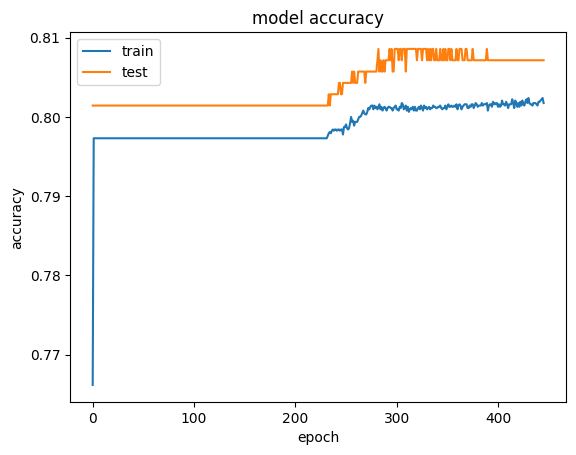

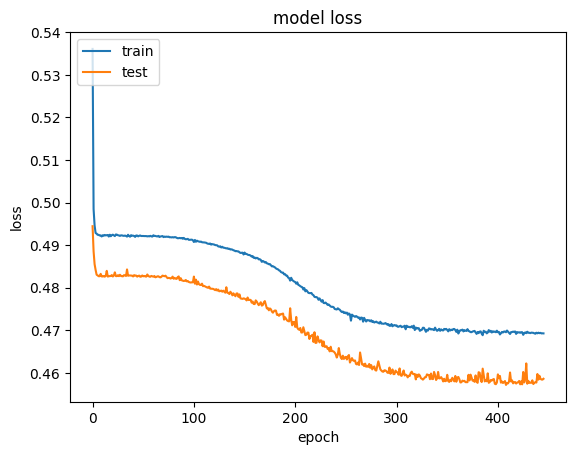

In [72]:
# Plotting Accuracy and Loss for the ANN model
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [73]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import Binarizer

y_pred = model_ann.predict(X_test)

binarizer = Binarizer(threshold=0.5)
y_pred_binary = binarizer.fit_transform(y_pred)

# reduce to 1d array
# y_pred = y_pred[:, 0]
y_pred_binary = y_pred_binary[:, 0]

#report = classification_report(y_test, y_pred_binary, labels=np.unique(y_pred), zero_division=1)
report = classification_report(y_test, y_pred_binary, zero_division=1)
print(report)

94/94 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2379
           1       0.78      0.05      0.09       621

    accuracy                           0.80      3000
   macro avg       0.79      0.52      0.49      3000
weighted avg       0.80      0.80      0.72      3000



# Making Predictions Using New Dataset